In [5]:
# !pip install gymnasium pygame

In [6]:
import gymnasium as gym

# Create the CartPole environment
env = gym.make("CartPole-v1")

# Reset the environment to its initial state
observation, info = env.reset()

for _ in range(1000):
    # Render the environment (this will display a window showing the CartPole)
    env.render()
    # Take a random action
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        break

# Close the environment
env.close()

In [8]:
import gymnasium as gym

env = gym.make("CartPole-v1")

def random_agent(observation):
    return env.action_space.sample()

observation, info = env.reset()
total_reward = 0

for _ in range(1000):
    action = random_agent(observation)
    observation, reward, terminated, truncated, info = env.step(action)
    total_reward += reward

    if terminated or truncated:
        break

print(f"Total reward: {total_reward}")
env.close()

Total reward: 38.0


In [14]:
import gymnasium as gym
import numpy as np

env = gym.make("FrozenLake-v1", render_mode="human")

# Initialize Q-table
num_states = env.observation_space.n
num_actions = env.action_space.n
Q = np.zeros((num_states, num_actions))

# Hyperparameters
learning_rate = 0.1
discount_factor = 0.95
num_episodes = 1000
exploration_rate = 0.25


for episode in range(num_episodes):
    state, info = env.reset()
    done = False
    print(f"Episode {episode + 1}/{num_episodes}")
    while not done:
        # Choose an action using epsilon-greedy policy
        if np.random.uniform(0, 1) < exploration_rate :
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])

        new_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        # Update Q-table
        Q[state, action] = Q[state, action] + learning_rate * (reward + discount_factor * np.max(Q[new_state, :]) - Q[state, action])

        state = new_state

env.close()

Episode 1/1000
Episode 2/1000
Episode 3/1000
Episode 4/1000
Episode 5/1000
Episode 6/1000
Episode 7/1000
Episode 8/1000
Episode 9/1000
Episode 10/1000
Episode 11/1000
Episode 12/1000
Episode 13/1000
Episode 14/1000
Episode 15/1000
Episode 16/1000
Episode 17/1000


KeyboardInterrupt: 

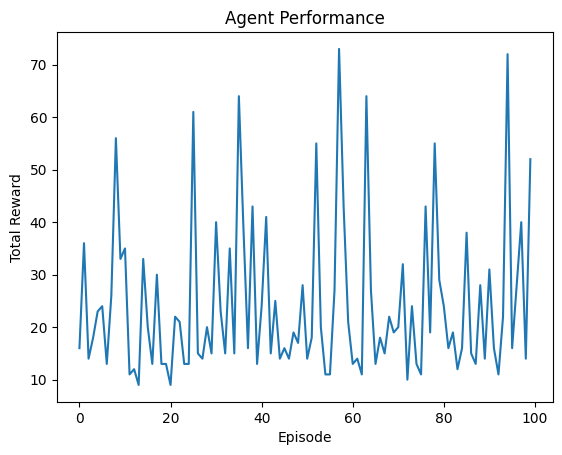

: 

In [ ]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("CartPole-v1")

# Agent implementation here...

episode_rewards = []
num_episodes = 100

for episode in range(num_episodes):
    observation, info = env.reset()
    episode_reward = 0
    done = False

    while not done:
        action = env.action_space.sample()
        observation, reward, terminated, truncated, info = env.step(action)
        episode_reward += reward
        done = terminated or truncated

    episode_rewards.append(episode_reward)

plt.plot(range(num_episodes), episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Agent Performance')
plt.show()

env.close()

In [2]:
import gymnasium as gym
gym.pprint_registry()

===== classic_control =====
Acrobot-v1             CartPole-v0            CartPole-v1
MountainCar-v0         MountainCarContinuous-v0 Pendulum-v1
===== phys2d =====
phys2d/CartPole-v0     phys2d/CartPole-v1     phys2d/Pendulum-v0
===== box2d =====
BipedalWalker-v3       BipedalWalkerHardcore-v3 CarRacing-v3
LunarLander-v3         LunarLanderContinuous-v3
===== toy_text =====
Blackjack-v1           CliffWalking-v1        CliffWalkingSlippery-v1
FrozenLake-v1          FrozenLake8x8-v1       Taxi-v3
===== tabular =====
tabular/Blackjack-v0   tabular/CliffWalking-v0
===== None =====
Ant-v2                 Ant-v3                 GymV21Environment-v0
GymV26Environment-v0   HalfCheetah-v2         HalfCheetah-v3
Hopper-v2              Hopper-v3              Humanoid-v2
Humanoid-v3            HumanoidStandup-v2     InvertedDoublePendulum-v2
InvertedPendulum-v2    Pusher-v2              Reacher-v2
Swimmer-v2             Swimmer-v3             Walker2d-v2
Walker2d-v3
===== mujoco =====
Ant-v4    

In [1]:
import gymnasium as gym

# Create our training environment - a cart with a pole that needs balancing
env = gym.make("CartPole-v1", render_mode="human")

# Reset environment to start a new episode
observation, info = env.reset()
# observation: what the agent can "see" - cart position, velocity, pole angle, etc.
# info: extra debugging information (usually not needed for basic learning)

print(f"Starting observation: {observation}")
# Example output: [ 0.01234567 -0.00987654  0.02345678  0.01456789]
# [cart_position, cart_velocity, pole_angle, pole_angular_velocity]

episode_over = False
total_reward = 0

while not episode_over:
    # Choose an action: 0 = push cart left, 1 = push cart right
    action = env.action_space.sample()  # Random action for now - real agents will be smarter!

    # Take the action and see what happens
    observation, reward, terminated, truncated, info = env.step(action)

    # reward: +1 for each step the pole stays upright
    # terminated: True if pole falls too far (agent failed)
    # truncated: True if we hit the time limit (500 steps)

    total_reward += reward
    episode_over = terminated or truncated

print(f"Episode finished! Total reward: {total_reward}")
env.close()

c:\Users\user\anaconda3\envs\ai_env\lib\site-packages\pygame\pkgdata.py:27: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


Starting observation: [ 0.00384399  0.01754717 -0.00488337 -0.039336  ]
Episode finished! Total reward: 11.0


In [2]:
import gymnasium as gym

# Discrete action space (button presses)
env = gym.make("CartPole-v1")
print(f"Action space: {env.action_space}")  # Discrete(2) - left or right
print(f"Sample action: {env.action_space.sample()}")  # 0 or 1

# Box observation space (continuous values)
print(f"Observation space: {env.observation_space}")  # Box with 4 values
# Box([-4.8, -inf, -0.418, -inf], [4.8, inf, 0.418, inf])
print(f"Sample observation: {env.observation_space.sample()}")  # Random valid observation

Action space: Discrete(2)
Sample action: 0
Observation space: Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
Sample observation: [-0.5099688  1.2164059  0.1052385  0.966493 ]


In [2]:
from collections import defaultdict
import gymnasium as gym
import numpy as np


class BlackjackAgent:
    def __init__(
        self,
        env: gym.Env,
        learning_rate: float,
        initial_epsilon: float,
        epsilon_decay: float,
        final_epsilon: float,
        discount_factor: float = 0.95,
    ):
        """Initialize a Q-Learning agent.

        Args:
            env: The training environment
            learning_rate: How quickly to update Q-values (0-1)
            initial_epsilon: Starting exploration rate (usually 1.0)
            epsilon_decay: How much to reduce epsilon each episode
            final_epsilon: Minimum exploration rate (usually 0.1)
            discount_factor: How much to value future rewards (0-1)
        """
        self.env = env

        # Q-table: maps (state, action) to expected reward
        # defaultdict automatically creates entries with zeros for new states
        self.q_values = defaultdict(lambda: np.zeros(env.action_space.n))

        self.lr = learning_rate
        self.discount_factor = discount_factor  # How much we care about future rewards

        # Exploration parameters
        self.epsilon = initial_epsilon
        self.epsilon_decay = epsilon_decay
        self.final_epsilon = final_epsilon

        # Track learning progress
        self.training_error = []

    def get_action(self, obs: tuple[int, int, bool]) -> int:
        """Choose an action using epsilon-greedy strategy.

        Returns:
            action: 0 (stand) or 1 (hit)
        """
        # With probability epsilon: explore (random action)
        if np.random.random() < self.epsilon:
            return self.env.action_space.sample()

        # With probability (1-epsilon): exploit (best known action)
        else:
            return int(np.argmax(self.q_values[obs]))

    def update(
        self,
        obs: tuple[int, int, bool],
        action: int,
        reward: float,
        terminated: bool,
        next_obs: tuple[int, int, bool],
    ):
        """Update Q-value based on experience.

        This is the heart of Q-learning: learn from (state, action, reward, next_state)
        """
        # What's the best we could do from the next state?
        # (Zero if episode terminated - no future rewards possible)
        future_q_value = (not terminated) * np.max(self.q_values[next_obs])

        # What should the Q-value be? (Bellman equation)
        target = reward + self.discount_factor * future_q_value

        # How wrong was our current estimate?
        temporal_difference = target - self.q_values[obs][action]

        # Update our estimate in the direction of the error
        # Learning rate controls how big steps we take
        self.q_values[obs][action] = (
            self.q_values[obs][action] + self.lr * temporal_difference
        )

        # Track learning progress (useful for debugging)
        self.training_error.append(temporal_difference)

    def decay_epsilon(self):
        """Reduce exploration rate after each episode."""
        self.epsilon = max(self.final_epsilon, self.epsilon - self.epsilon_decay)

In [5]:
# Training hyperparameters
learning_rate = 0.01        # How fast to learn (higher = faster but less stable)
n_episodes = 500        # Number of hands to practice
start_epsilon = 1.0         # Start with 100% random actions
epsilon_decay = start_epsilon / (n_episodes / 2)  # Reduce exploration over time
final_epsilon = 0.1         # Always keep some exploration

# Create environment and agent
env = gym.make("FrozenLake-v1", render_mode="human")
# env = gym.wrappers.RecordEpisodeStatistics(env, buffer_length=n_episodes)

agent = BlackjackAgent(
    env=env,
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
)

In [6]:
from tqdm import tqdm  # Progress bar

for episode in tqdm(range(n_episodes)):
    # Start a new hand
    obs, info = env.reset()
    done = False

    # Play one complete hand
    while not done:
        # Agent chooses action (initially random, gradually more intelligent)
        action = agent.get_action(obs)

        # Take action and observe result
        next_obs, reward, terminated, truncated, info = env.step(action)

        # Learn from this experience
        agent.update(obs, action, reward, terminated, next_obs)

        # Move to next state
        done = terminated or truncated
        obs = next_obs

    # Reduce exploration rate (agent becomes less random over time)
    agent.decay_epsilon()

100%|██████████| 500/500 [20:55<00:00,  2.51s/it]


In [ ]:
# Test the trained agent
def test_agent(agent, env, num_episodes=100):
    """Test agent performance without learning or exploration."""
    total_rewards = []

    # Temporarily disable exploration for testing
    old_epsilon = agent.epsilon
    agent.epsilon = 0.0  # Pure exploitation

    for _ in tqdm(range(num_episodes)):
        obs, info = env.reset()
        episode_reward = 0
        done = False

        while not done:
            action = agent.get_action(obs)
            obs, reward, terminated, truncated, info = env.step(action)
            episode_reward += reward
            done = terminated or truncated

        total_rewards.append(episode_reward)

    # Restore original epsilon
    agent.epsilon = old_epsilon

    win_rate = np.mean(np.array(total_rewards) > 0)
    average_reward = np.mean(total_rewards)

    print(f"Test Results over {num_episodes} episodes:")
    print(f"Win Rate: {win_rate:.1%}")
    print(f"Average Reward: {average_reward:.3f}")
    print(f"Standard Deviation: {np.std(total_rewards):.3f}")

# Test your agent
test_agent(agent, env)

Test Results over 1000 episodes:
Win Rate: 8.6%
Average Reward: 0.086
Standard Deviation: 0.280


: 